## Use-case demonstration of oocgcm.modelgrids

- **author** : Julien Le Sommer
- **date** : May 2016
- **purpose** : This notebook is used for testing/debugging modelgrids during the development process. It will eventually become a demonstration notebook when occgcm is ready for dissemination.

In [1]:
import sys
sys.path.append("/Users/lesommer/git/oocgcm/")

In [2]:
#- Modules
import modelgrids as mg
import xarray as xr
from matplotlib import pyplot as plt

In [3]:
%matplotlib inline

In [4]:
#- Parameter
coordfile  = '/Users/lesommer/data/NATL60/NATL60-I/NATL60_coordinates_v4.nc'
maskfile = '/Users/lesommer/data/NATL60/NATL60-I/NATL60_v4.1_cdf_byte_mask.nc'
filenatl60 = '/Users/lesommer/data/NATL60/NATL60-MJM155-S/1d/2008/NATL60-MJM155_y2008m01.1d_BUOYANCYFLX.nc'

#chunks = (3454,5422)
chunks = (1727,2711)
xr_chunks = {'x': chunks[-1], 'y': chunks[-2]}
xr_chunks_t = {'x': chunks[-1], 'y': chunks[-2],'time_counter':1}

In [5]:
#- creating the grid object
grd = mg.nemo_2d_grid(nemo_coordinate_file=coordfile,nemo_byte_mask_file=maskfile,chunks=xr_chunks)

### with a 2D input xarray dataarray at a given time

In [6]:
#- defining a 2D xarray
sig0 = xr.open_dataset(filenatl60,chunks=xr_chunks,lock=False)['vosigma0'][20]

In [7]:
sig0.shape

(3454, 5422)

In [8]:
#- compute the horizontal gradient
gx,gy = grd.horizontal_gradient(sig0)

In [9]:
%time g = gx.load()

CPU times: user 937 ms, sys: 842 ms, total: 1.78 s
Wall time: 1.17 s


### with a 2D + time input xarray dataarray

In [10]:
#- defining a 2D xarray
sig0 = xr.open_dataset(filenatl60,chunks=xr_chunks_t,lock=False)['vosigma0']

In [11]:
#- compute the horizontal gradient
gx,gy = grd.horizontal_gradient(sig0)

In [12]:
%time g = gx[20].load()

CPU times: user 995 ms, sys: 706 ms, total: 1.7 s
Wall time: 1.47 s


### plotting the output array

/Users/lesommer/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


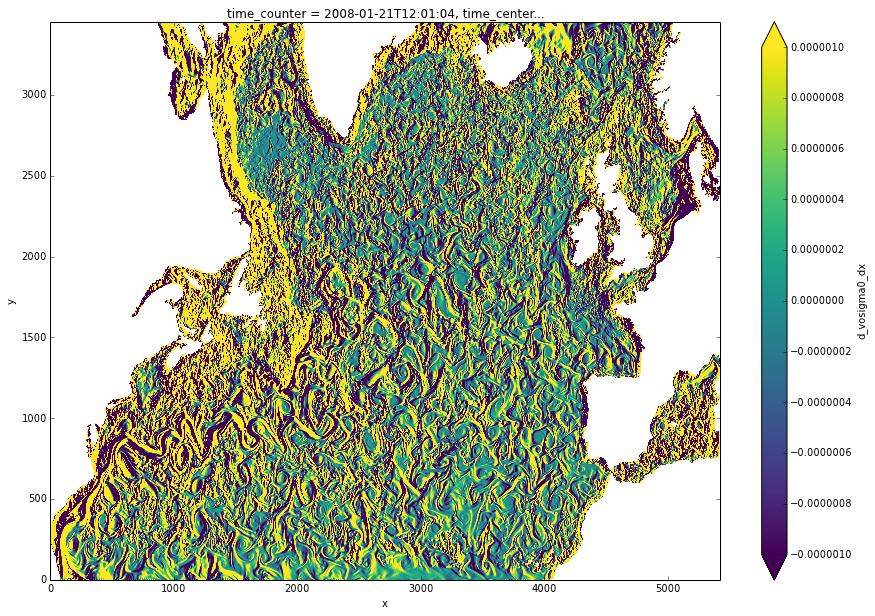

In [13]:
#- plot the horizontal gradient
plt.figure(figsize=(15,10))
gx[20].plot.pcolormesh(vmin=-1e-6,vmax=1e-6)